In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:listings.csv')

In [3]:
def clean_data():
    global df
    df=df.drop_duplicates()
    df= df.drop(columns=['neighbourhood_group_cleansed','reviews_per_month','first_review','last_review',
                    'bathrooms','calendar_updated',
                    'calculated_host_listings_count','calculated_host_listings_count_shared_rooms',
                    'calculated_host_listings_count_private_rooms',
                         'calculated_host_listings_count_entire_homes',
                         'instant_bookable'])
    df['license']=df['license'].fillna(' ')
    df['neighborhood_overview']=df['neighborhood_overview'].fillna(' ')
    df['host_location']=df['host_location'].fillna(' ')
    df['host_about']=df['host_about'].fillna(' ')
    df['host_response_time']=df['host_response_time'].fillna(' ')
    df['host_acceptance_rate']=df['host_acceptance_rate'].fillna('0%')
    df['host_response_rate']=df['host_response_rate'].fillna(' ')
    df['host_is_superhost']=df['host_is_superhost'].fillna(' ')
    df['host_neighbourhood']=df['host_neighbourhood'].fillna(' ')
    df['neighbourhood']=df['neighbourhood'].fillna(' ')
    df['bedrooms']=df['bedrooms'].fillna(0.0)
    df['beds']=df['beds'].fillna(0.0)
    df['review_scores_rating']=df['review_scores_rating'].fillna('0%')
    df['review_scores_rating']=df['review_scores_rating'].fillna('0%')
    df['review_scores_cleanliness']=df['review_scores_cleanliness'].fillna('0%')
    df['review_scores_checkin']=df['review_scores_checkin'].fillna('0%')
    df['review_scores_communication']=df['review_scores_communication'].fillna('0%')
    df['review_scores_location']=df['review_scores_location'].fillna('0%')
    df['review_scores_value']=df['review_scores_value'].fillna('0%')
    df['review_scores_accuracy']=df['review_scores_accuracy'].fillna('0%')
    df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)
    df['property_type'] = df['property_type'].str.replace('Entire rental unit', 'ERU ').str.replace('Private room in condo', 'PR Con').str.replace('Private room in rental unit','PR RU').str.replace('Entire home','EH').str.replace('Entire condo','EC').str.replace('Private room in bed and breakfast','P R B&B').str.replace('Private room in townhouse','P R T')
    df['property_type']=df['property_type'].str.replace('Room in boutique hotel','R B H').str.replace('Private room in guest suite','PRGS').str.replace('Private room in loft','PRL').str.replace('Private room in bed and breakfast','PR B&B')
    df['property_type']=df['property_type'].str.replace('Entire guesthouse','EG').str.replace('Private room in home','PRH').str.replace('Private room in boat','PRB').str.replace('Entire townhouse','ET').str.replace('Private room in houseboat','PRHB').str.replace('Entire loft','EL').str.replace('Private room in farm stay','PRFS').str.replace('Room in bed and breakfast','RB&B').str.replace('Private room in guesthouse','PRGH')
    
    df.drop_duplicates(inplace=True)

In [4]:
clean_data()

C:\Users\AYMAN\AppData\Local\Temp\ipykernel_10428\2124060646.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)


In [5]:
def explore_data(df):
    sns.histplot(df['price'], bins=30, kde=True)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prices')
    plt.show()
    
    plt.figure(figsize=(12, 10))
    sns.histplot(df['property_type'].head(100), bins=30, kde=True)
    plt.xlabel('property_type')
    plt.ylabel('Frequency')
    plt.title('Distribution of property_type')
    plt.show()

In [6]:
def price_analysis(df):
    price_by_property = df.groupby('property_type')['price'].mean().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=price_by_property.index, y=price_by_property.values)
    plt.xlabel('Property Type')
    plt.ylabel('Average Price')
    plt.title('Average Price by Property Type')
    plt.xticks(rotation=90)
    plt.show()

In [7]:
def location_analysis(df):
    latitude = df['latitude']
    longitude = df['longitude']

    plt.figure(figsize=(10, 8))
    plt.scatter(longitude, latitude, alpha=0.5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geographical Distribution of Airbnb Listings')
    plt.grid(True)
    plt.show()


In [8]:
def property_analyse(df):       
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df.head(1000), x='property_type')
    plt.title('Property Type Distribution')
    plt.xlabel('Property Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


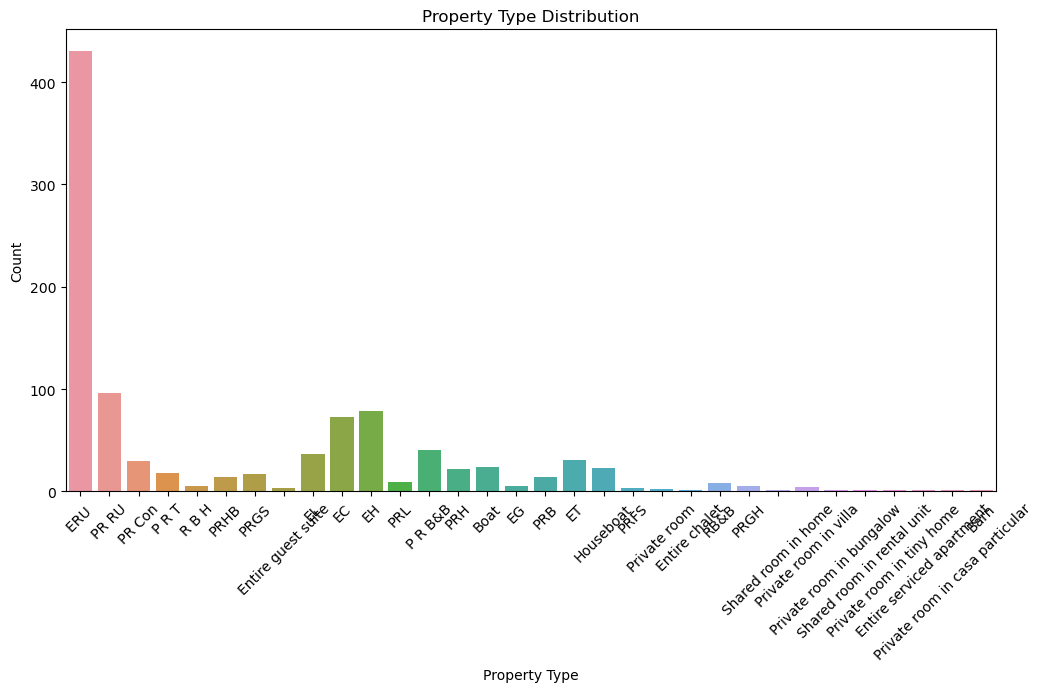

In [9]:
property_analyse(df)

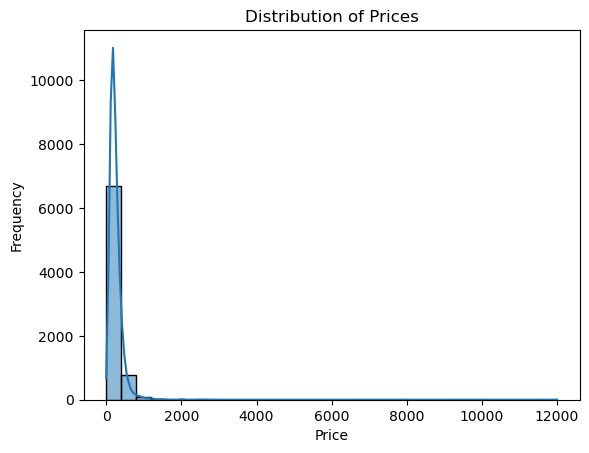

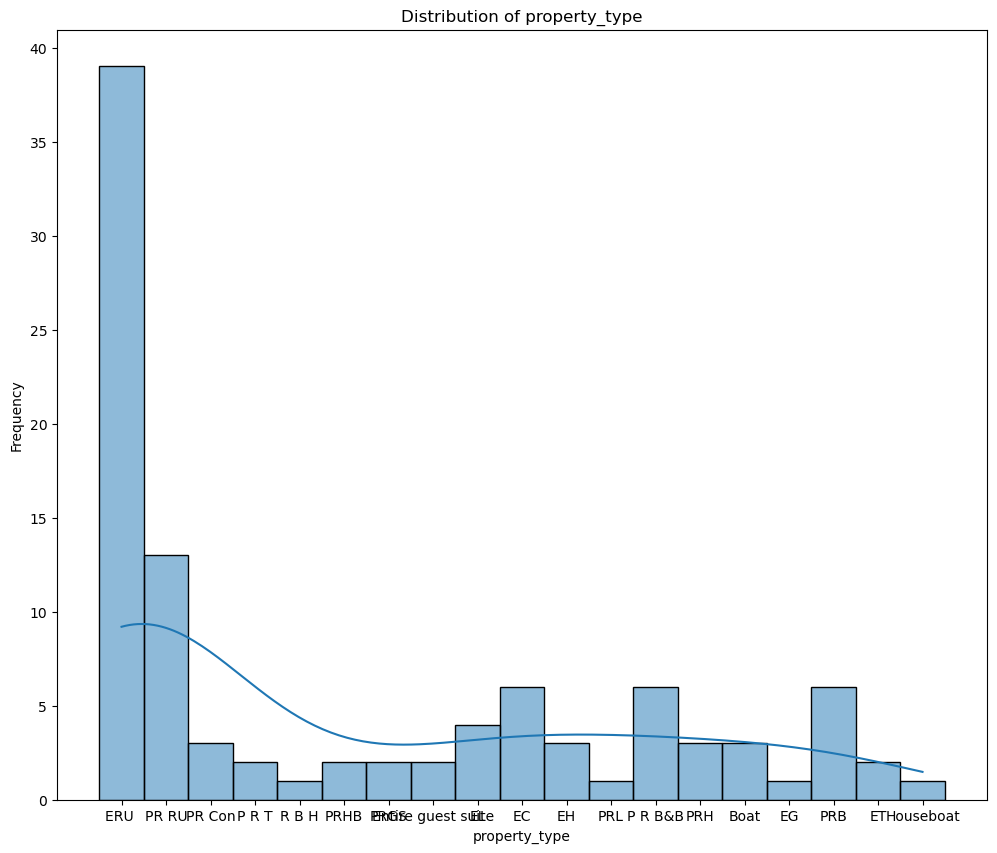

In [10]:
explore_data(df)

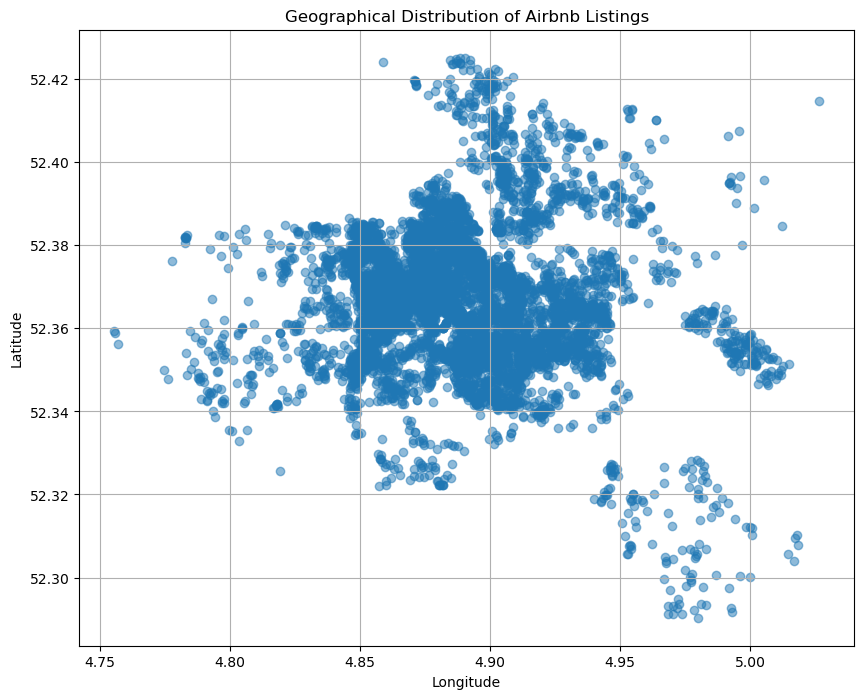

In [11]:
location_analysis(df)

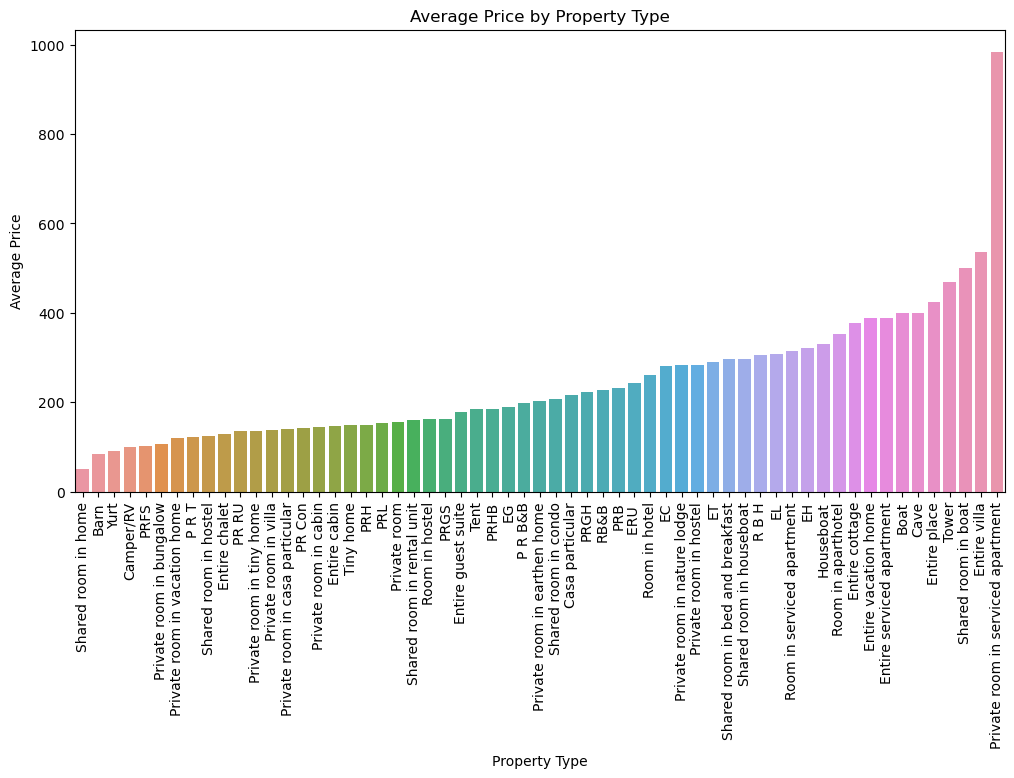

In [12]:
price_analysis(df)